## Problem Statement
Banking-Classification

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


Feraure Explanation

1. Age: The age of the customer.
2. Job: The type of job the customer has.
3. Marital: The marital status of the customer.
4. Education: The level of education of the customer.
5. Default: Whether the customer has defaulted on a loan in the past.
6. Housing: Whether the customer has a housing loan.
7. Loan: Whether the customer has a personal loan.
8. Contact: The method of communication used to contact the customer.
9. Month: The month in which the customer was last contacted.
10. Day_of_week: The day of the week on which the customer was last contacted.
11. Duration: The duration of the last contact with the custome,it was the important fearute because if duration=0 then y=no.
12. Campaign: The number of contacts made during this campaign for this customer.
13. Pdays: The number of days that passed by after the customer was last contacted from a previous campaign.
14. Previous: The number of contacts made before this campaign for this customer.
15. Poutcome: The outcome of the previous marketing campaign.

These features can be used to predict whether the customer will subscribe to a bank term deposit (the target variable 'y'). 


# Pseudo code

# Loading Required Libraries & Datasets

In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
train_data=pd.read_csv('/content/new_train.csv')
test_data=pd.read_csv('/content/new_test (1).csv')


# EDA

In [4]:
# To check train data 
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
train_data.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [6]:
# to check train data shape
# shape includes no of records & features 
train_data.shape

(32950, 16)

In [7]:
#test_data=test_data.sample(n=1500)

In [8]:
#To check test data
test_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [9]:
# to check test data shape
# shape includes no of records & features 
test_data.shape


(8238, 13)

In [10]:
# Total count,Range,percentiles,standard deviation of each feature 
train_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [11]:
test_data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,39.613498,3.729425,1.170430,3.740592,0.201141,1.072833,0.320952,0.364409,4.220685,2.020879,227.820588,2.207575,0.932629
std,9.021371,3.597274,0.610371,2.134617,0.400878,0.985527,0.717918,0.481293,2.321464,1.386752,160.447506,1.380902,0.357648
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,101.000000,1.000000,1.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,178.000000,2.000000,1.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,1.000000
max,55.000000,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,554.000000,5.000000,2.000000


In [12]:
#no of unique values in each feature 
train_data.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

In [13]:
test_data.nunique()

age             30
job             12
marital          4
education        8
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       517
campaign         5
poutcome         3
dtype: int64

In [14]:
#info regarding class , index , non null values count , Data Types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [16]:
#Total null values count in data 
train_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [17]:
test_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64

In [18]:
#correlation between features 
#If correlation is high we drop either one of the features
train_data.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


<AxesSubplot:>

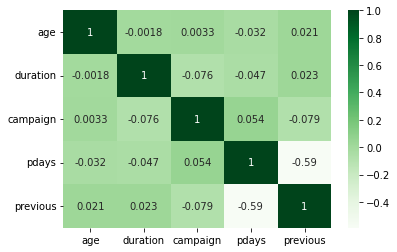

In [19]:
# features correlation with  visualization 
# features correlation indicated in colours & more correlated with white
sns.heatmap(train_data.corr(),annot=True,cmap='Greens')

In [20]:
test_data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
age,1.000000,0.002677,-0.397970,-0.119857,0.173502,0.002880,-0.024576,0.025620,-0.015358,-0.016473,-0.000643,0.013662,0.013113
job,0.002677,1.000000,0.016581,0.141292,-0.026743,0.000902,-0.003742,-0.026557,-0.057963,-0.007312,0.003009,-0.002036,0.011968
marital,-0.397970,0.016581,1.000000,0.106989,-0.066685,-0.018620,0.001492,-0.053571,-0.018236,0.000385,0.014694,-0.033047,-0.003010
education,-0.119857,0.141292,0.106989,1.000000,-0.183890,-0.010812,0.003951,-0.112409,-0.080587,-0.017241,-0.012129,0.011515,0.016702
default,0.173502,-0.026743,-0.066685,-0.183890,1.000000,-0.002054,-0.002876,0.129102,0.000303,0.018432,-0.013423,0.017555,0.010697
housing,0.002880,0.000902,-0.018620,-0.010812,-0.002054,1.000000,0.041426,-0.078997,-0.015039,-0.001646,-0.008423,-0.006739,0.001179
loan,-0.024576,-0.003742,0.001492,0.003951,-0.002876,0.041426,1.000000,-0.005445,-0.006446,0.009121,-0.023685,0.012022,0.009517
contact,0.025620,-0.026557,-0.053571,-0.112409,0.129102,-0.078997,-0.005445,1.000000,0.281152,-0.019222,-0.034859,0.085097,0.107378
month,-0.015358,-0.057963,-0.018236,-0.080587,0.000303,-0.015039,-0.006446,0.281152,1.000000,0.043897,0.015305,-0.064773,-0.062513
day_of_week,-0.016473,-0.007312,0.000385,-0.017241,0.018432,-0.001646,0.009121,-0.019222,0.043897,1.000000,0.029727,-0.058814,0.037106


<AxesSubplot:>

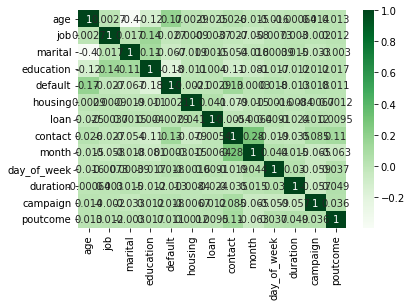

In [21]:
sns.heatmap(test_data.corr(),annot=True,cmap='Greens')

# Data Preprocessing

In [22]:
#Drop features may not required in model prediction 
xtr=train_data.drop(['pdays','previous','month','day_of_week'],axis=1)
xte=test_data.drop(['month','day_of_week'],axis=1)
xtr

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,202,2,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,368,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,165,1,nonexistent,no


In [23]:
# splitting numerical & categorical columns
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [24]:
#numerical features 
num_cols

['age', 'duration', 'campaign']

In [25]:
#categorical features 
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [26]:
# converting numerical & categorical columns into data frames 
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

,job,marital,education,default,housing,loan,contact,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,failure,no
2,retired,married,basic.4y,no,no,no,cellular,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,nonexistent,no
...,...,...,...,...,...,...,...,...,...
32945,services,single,high.school,no,yes,no,cellular,nonexistent,no
32946,technician,married,professional.course,no,yes,no,cellular,failure,no
32947,admin.,married,basic.9y,no,no,yes,cellular,nonexistent,no
32948,admin.,married,university.degree,no,no,no,telephone,nonexistent,no


In [27]:
xtr_cat=pd.DataFrame(xtr_cat)

In [28]:
xtr_cat1=xtr_cat.drop(['y'],axis=1)
target=xtr_cat.drop(xtr_cat1,axis=1)
target.head()

,y
0,no
1,no
2,yes
3,no
4,no


In [29]:
cat_cols1=list(xtr_cat1.select_dtypes(include='object').columns)

In [30]:
# converting numerical & categorical columns into data frames 
xtr_cat1_tr=xtr[cat_cols]
xtr_cat1[cat_cols1]=xtr_cat1[cat_cols1].astype("category")
xtr_cat1

,job,marital,education,default,housing,loan,contact,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nonexistent
1,entrepreneur,married,university.degree,no,no,no,telephone,failure
2,retired,married,basic.4y,no,no,no,cellular,nonexistent
3,admin.,married,university.degree,no,yes,no,telephone,nonexistent
4,retired,divorced,university.degree,no,no,no,cellular,nonexistent
...,...,...,...,...,...,...,...,...
32945,services,single,high.school,no,yes,no,cellular,nonexistent
32946,technician,married,professional.course,no,yes,no,cellular,failure
32947,admin.,married,basic.9y,no,no,yes,cellular,nonexistent
32948,admin.,married,university.degree,no,no,no,telephone,nonexistent


In [31]:
xtr_num

,age,duration,campaign
0,49,227,4
1,37,202,2
2,78,1148,1
3,36,120,2
4,59,368,2
...,...,...,...
32945,28,192,1
32946,52,64,1
32947,54,131,4
32948,29,165,1


In [32]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols1: 
    xtr_cat1[col]=encoder.fit_transform(xtr_cat1[col])

In [33]:
xtr_cat1.head()

,job,marital,education,default,housing,loan,contact,poutcome
0,1,1,2,1,0,0,0,1
1,2,1,6,0,0,0,1,0
2,5,1,0,0,0,0,0,1
3,0,1,6,0,2,0,1,1
4,5,0,6,0,0,0,0,1


In [34]:
encoder_tg=LabelEncoder() 
target_enc=encoder_tg.fit_transform(target)

In [35]:
xtr_cat1.head()

,job,marital,education,default,housing,loan,contact,poutcome
0,1,1,2,1,0,0,0,1
1,2,1,6,0,0,0,1,0
2,5,1,0,0,0,0,0,1
3,0,1,6,0,2,0,1,1
4,5,0,6,0,0,0,0,1


In [36]:
xtr_cat1=pd.concat([xtr_cat1,target],axis=1)

In [37]:
#concatination of transformed categorical data & numerical data
train_data1=pd.concat([xtr_cat1,xtr_num],axis=1)

In [38]:
columns=train_data1.columns
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'age', 'duration', 'campaign'],
      dtype='object')

In [39]:
columns=xte.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [40]:
#concating the target variable to data
x_ov=train_data1.drop(['y'],axis=1)
y_ov=train_data1.drop(x_ov,axis=1)

In [41]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#Separate majority and minority classes
x_df = train_data1[train_data1['y']==0]
y_df = train_data1[train_data1['y']==1]



In [42]:
print(x_df.shape,y_df.shape)

(0, 12) (0, 12)


In [43]:
smk=SMOTETomek(random_state=42)

In [44]:
x_ov1,y_ov1=smk.fit_resample(x_ov,y_ov)


In [45]:
print(x_ov1.shape,y_ov1.shape)

(57816, 11) (57816, 1)


In [46]:
y_ov1.value_counts()

y  
no     28908
yes    28908
dtype: int64

In [47]:
#normalizing the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data1=pd.DataFrame(scale.fit_transform(x_ov1),columns=columns)
test_data1=pd.DataFrame(scale.fit_transform(xte),columns=columns)
train_data1.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome
0,0.090909,0.333333,0.285714,0.5,0.0,0.0,0.0,0.5,0.395062,0.046157,0.054545
1,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.0,0.246914,0.041074,0.018182
2,0.454545,0.333333,0.000000,0.0,0.0,0.0,0.0,0.5,0.753086,0.233428,0.000000
3,0.000000,0.333333,0.857143,0.0,1.0,0.0,1.0,0.5,0.234568,0.024400,0.018182
4,0.454545,0.000000,0.857143,0.0,0.0,0.0,0.0,0.5,0.518519,0.074827,0.018182


In [48]:
test_data1.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome
0,0.206897,0.363636,0.000000,0.857143,0.0,0.0,0.0,0.0,0.183398,1.00,0.5
1,0.379310,0.909091,1.000000,0.857143,0.0,0.0,0.0,0.0,0.123552,0.00,0.5
2,1.000000,0.454545,0.000000,0.714286,1.0,1.0,0.0,0.0,0.183398,0.25,0.5
3,0.620690,0.181818,0.333333,0.000000,1.0,0.0,0.0,1.0,0.023166,0.25,0.5
4,0.068966,0.000000,0.666667,0.428571,0.0,0.0,0.0,0.0,0.208494,0.25,0.5


# Train_Test_Split

In [111]:
#split data with test size of 40%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data1,y_ov1,test_size=0.4,random_state=12345)
print(x_train.shape)
print(y_train.shape)
y_test.shape

(34689, 11)
(34689, 1)


(23127, 1)

In [85]:
print(x_test.shape)

(11564, 11)


# Building a Model 

In [149]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        num_test = X.shape[0]
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
        
        for i in range(num_test):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_classes = self.y_train[nearest_indices]
            y_pred[i] = np.argmax(np.bincount(nearest_classes))
        
        return y_pred

def cross_val_score(model, X, y, cv):
    scores = []
    fold_size = len(X) // cv
    
    for i in range(cv):
        start = i * fold_size
        end = (i+1) * fold_size if i < cv-1 else len(X)
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = np.mean(y_pred == y_val)
        scores.append(score)
        
    return np.array(scores)

def grid_search(model, X, y, param_grid, cv=5):
    best_params = None
    best_score = -np.inf
    
    for params in param_grid:
        model.set_params(**params)
        scores = cross_val_score(model, X, y, cv)


In [140]:
# initialize KNN classifier
k = 5
knn = Knn(k)

In [138]:
knn = KNeighborsClassifier()

In [87]:
knn.fit(x_train, y_train)

# Scores 

In [130]:
# define the parameter grid
param_grid = {'n_neighbors': [7,9]}

In [131]:
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=7)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9]})

In [133]:
y_pred = grid_search.predict(x_train)

In [134]:
#best hyper parameter and accuaracy predicted 
print(grid_search.best_params_)
accuracy = accuracy_score(y_train, y_pred)
print('Train accuracy: ',accuracy)

{'n_neighbors': 7}
Train accuracy:  0.8907146357634985


In [135]:
best_knn = grid_search.best_estimator_
y_pred1 = best_knn.predict(x_test)

In [136]:
#accuracy predicted on test data
test_accuracy = accuracy_score(y_test, y_pred1)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8651792277424655


##Conclusion

This problem is important for banks because it allows them to identify potential customers who are more likely to subscribe to their services, and to target their marketing efforts more effectively.
It also allows them to better manage their resources and optimize their marketing strategies, ultimately leading to increased revenue and profitability.